# Training UkiNet model

Please refer to README file for project overview.

In [1]:
data_dir = "../../../DATA/behavioral_cloning_data/"

In [2]:

import matplotlib.image as mpimg
from scipy import misc
import matplotlib.pyplot as plt
import cv2

In [3]:
import DataHelper
#print(DataHelper.__doc__)
from DataHelper import test_read_csv, read_csv
#print(read_csv.__doc__)
#test_read_csv()
# fetch actual log of driving data
headers, data = read_csv(data_dir + "driving_log.csv")

imported rows 8037


# Labels (steering value classes)

- Please review notebook "preprocessing", section: "Steering value distribution".
- Training labels have values ranging from -1 to +1.
- When you steer with **keyboard** the STEPS are rather corse, so I think I can get away with **discrete steering angles, i.e. classes**.
- I will start training with 21 equally spread classes, if needed I will increase to 41.
- I want to make sure that my classes include **0.0 (zero)** as it is most common value.

steering_classes [-1.  -0.9 -0.8 -0.7 -0.6 -0.5 -0.4 -0.3 -0.2 -0.1  0.   0.1  0.2  0.3  0.4
  0.5  0.6  0.7  0.8  0.9  1. ]
Number of classes 21


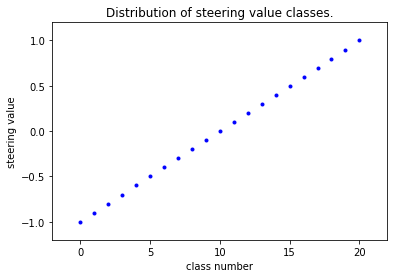

In [4]:
import numpy as np
from numpy import ndarray
number_of_classes = 21
steering_classes = np.linspace(-1, 1, num=number_of_classes, endpoint=True) 
steering_classes = np.sort(steering_classes)
print("steering_classes", steering_classes)
print("Number of classes",steering_classes.shape[0])

import matplotlib.pyplot as plt
plt.plot(steering_classes, 'b.')
plt.margins(0.1)
plt.title("Distribution of steering value classes.")
plt.xlabel("class number")
plt.ylabel('steering value')
plt.show()

# Split data into training, testing and validation sets

In [5]:
from DataHelper import split_random, get_image_center_values
image_center_values = get_image_center_values(data)

training, testing, validation = \
split_random(data, percent_train=70, percent_test=15) 

print("training",training.shape)
print("testing",testing.shape)
print("validation",validation.shape)

percent_validation 15
training (5626, 7)
testing (1206, 7)
validation (1204, 7)


# Extract training features (images)

In [6]:
from DataHelper import get_image_center_values 
image_names = get_image_center_values(training)
print(image_names.shape)
print(image_names[1])

(5626,)
IMG/center_2016_12_01_13_37_23_978.jpg


## Create a list of image paths pointing to 64px version

In [7]:
image_paths = []
for image_name in image_names:
    image_paths.extend([data_dir + "processed_images_64/" + image_name])
print(image_paths[1]) 

../../../DATA/behavioral_cloning_data/processed_images_64/IMG/center_2016_12_01_13_37_23_978.jpg


In [8]:
from DataHelper import read_image
training_features = np.array([ read_image(path) for path in image_paths] )

print ("matrix shape", training_features.shape)
plt.imshow(training_features[2], cmap='gray')
plt.show()

NameError: name 'cv2' is not defined

In [ ]:
blank_image = np.zeros((14, 64, 2), dtype=np.float64)

from random import randrange, uniform
random_index = 1# randrange(0, 5626) 
 
print("training_features shape", training_features.shape)
image = training_features[random_index]
#print(image[0,0,:])
print("training_feature shape", image.shape)
plt.imshow(image)
plt.show()
print("training_feature \n", image)

modifield = np.append(image, blank_image)
print("modifield", modifield.shape)
plt.imshow(modifieldv)
plt.show()

In [ ]:
def normalize_grayscale(image_data):
    a = -0.5
    b = 0.5
    grayscale_min = 0
    grayscale_max = 255
    return a + ( ( (image_data - grayscale_min)*(b - a) )/( grayscale_max - grayscale_min ) )

training_features_normalized = normalize_grayscale(training_features)

# Extract training labels (steering value classes) 

In [ ]:
from DataHelper import get_steering_values, find_nearest
raw_labels = get_steering_values(training)
print(raw_labels.shape)
print(raw_labels[0:5])

training_labels = np.array([], dtype=np.float64)

for raw_label in raw_labels: # raw_labels[:5]
    #print("raw_label", raw_label)
    label = find_nearest(steering_classes, raw_label)
    #print("normalized label", label)
    
    # Classification labels should be strings:
    training_labels = np.append(training_labels, [str(label)])
        
print(training_labels)

## One hot

In [ ]:
import sklearn
from sklearn.preprocessing import LabelBinarizer
label_binarizer = LabelBinarizer()
y_one_hot = label_binarizer.fit_transform(training_labels)
print(y_one_hot)

# Extract 

# Keras (with TensorFlow)

In [ ]:
from keras.models import Sequential
from keras.layers.core import Flatten, Dense, Dropout, Activation
from keras.layers.convolutional import Convolution2D, MaxPooling2D, ZeroPadding2D
from keras.activations import relu, softmax
from keras.optimizers import SGD
import cv2, numpy as np

In [ ]:
#model.add(Convolution2D(64, 3, 3, activation='relu'))
#model.add(ZeroPadding2D((1,1)))
#model.add(Convolution2D(64, 3, 3, activation='relu'))
#model.add(MaxPooling2D((2,2), strides=(2,2)))

#model.add(ZeroPadding2D((1,1)))
#model.add(Convolution2D(128, 3, 3, activation='relu'))
#model.add(ZeroPadding2D((1,1)))
#model.add(Convolution2D(128, 3, 3, activation='relu'))
#model.add(MaxPooling2D((2,2), strides=(2,2)))

#model.add(ZeroPadding2D((1,1)))
#model.add(Convolution2D(256, 3, 3, activation='relu'))
#model.add(ZeroPadding2D((1,1)))
#model.add(Convolution2D(256, 3, 3, activation='relu'))
#model.add(ZeroPadding2D((1,1)))
#model.add(Convolution2D(256, 3, 3, activation='relu'))
#model.add(MaxPooling2D((2,2), strides=(2,2)))

#model.add(ZeroPadding2D((1,1)))
#model.add(Convolution2D(512, 3, 3, activation='relu'))
#model.add(ZeroPadding2D((1,1)))
#model.add(Convolution2D(512, 3, 3, activation='relu'))
#model.add(ZeroPadding2D((1,1)))
#model.add(Convolution2D(512, 3, 3, activation='relu'))
#model.add(MaxPooling2D((2,2), strides=(2,2)))

#model.add(ZeroPadding2D((1,1)))
#model.add(Convolution2D(512, 3, 3, activation='relu'))
#model.add(ZeroPadding2D((1,1)))
#model.add(Convolution2D(512, 3, 3, activation='relu'))
#model.add(ZeroPadding2D((1,1)))
#model.add(Convolution2D(512, 3, 3, activation='relu'))
#model.add(MaxPooling2D((2,2), strides=(2,2)))
    
def UkiNet(weights_path=None):
    model = Sequential()
    
    # original images are (3, 14, 64) need to square them
    # Exception: Error when checking model input: 
            # expected zeropadding2d_input_1 to have 4 dimensions, 
            # but got array with shape (5626, 14, 64)
            # model.add(ZeroPadding2D((1,1),input_shape=(3,64,64))
 
    model.add(ZeroPadding2D((1,1),input_shape=(1,64,64)))
    # Might be redundant, but assure the size 64x64
    model.add(Flatten(input_shape=(64, 64, 3)))
    
    model.add(Dense(128)) # Fully connected 
    model.add(Activation('relu')) # ReLU activation
    model.add(Dense(43))
    model.add(Activation('softmax'))
    


    #Input 0 is incompatible with layer flatten_7: expected ndim >= 3, found ndim=2
    #model.add(Flatten())
    #model.add(Dense(4096, activation='relu'))
    #model.add(Dropout(0.5))
    #model.add(Dense(4096, activation='relu'))
    #model.add(Dropout(0.5))
    
    # I want to end up with 21 classes
    model.add(Dense(21, activation='softmax'))

    if weights_path:
        model.load_weights(weights_path)
    return model

model = UkiNet()
# Configures the learning process and metrics
model.compile('sgd', 'mean_squared_error', ['accuracy'])
history = model.fit(training_features_normalized, y_one_hot, nb_epoch=10, validation_split=0.2)

In [ ]:
def check_layers(layers, true_layers):
    assert len(true_layers) != 0, 'No layers found'
    for layer_i in range(len(layers)):
        assert isinstance(true_layers[layer_i], layers[layer_i]), \
        'Layer {} is not a {} layer'.format(layer_i+1, layers[layer_i].__name__)
        
    assert len(true_layers) == len(layers), \
    '{} layers found, should be {} layers'.format(len(true_layers), len(layers))

check_layers([Flatten, Dense, Activation, Dense, Activation], model.layers)